In [1]:
import seaborn as sns
from tqdm import tqdm
from datasets import load_dataset
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")
bookcorpus = load_dataset("bookcorpus")["train"].shuffle(seed=42).select(range(100_000))

get_number_of_tokens = lambda sample: len(tokenizer(sample["text"])["input_ids"])

/opt/homebrew/Caskroom/miniconda/base/envs/bert/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/bert/lib/python3.12/site-packages/datasets/load.py:1486: FutureWarning: The repository for bookcorpus contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/bookcorpus
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [2]:
lengths = [get_number_of_tokens(sample) for sample in tqdm(bookcorpus)]

100%|██████████| 100000/100000 [00:20<00:00, 4771.44it/s]


<Axes: ylabel='Count'>

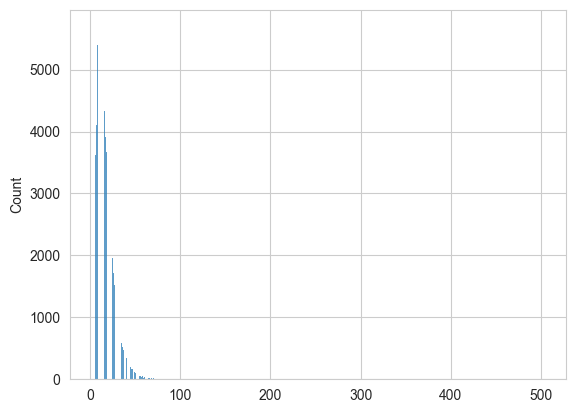

In [3]:
sns.histplot(lengths)

This plot shows that for a random subset of 100k samples from bookcorpus the majority has less than 100 tokens. Samples should have a length of at least 512 tokens to be used for the entire training. Therefore, bookcorpus will not be used for the pre-training of the model at this point.